# Телеком

Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

## Описание 

### Описание услуг

Оператор предоставляет два основных типа услуг: 

1. Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
2. Интернет. Подключение может быть двух типов: через телефонную линию (DSL*,* от англ. *digital subscriber line*, «цифровая абонентская линия») или оптоволоконный кабель (*Fiber optic*).

Также доступны такие услуги:

- Интернет-безопасность: антивирус (*DeviceProtection*) и блокировка небезопасных сайтов (*OnlineSecurity*);
- Выделенная линия технической поддержки (*TechSupport*);
- Облачное хранилище файлов для резервного копирования данных (*OnlineBackup*);
- Стриминговое телевидение (*StreamingTV*) и каталог фильмов (*StreamingMovies*).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

### Описание данных

Данные состоят из файлов, полученных из разных источников:

- `contract.csv` — информация о договоре;
- `personal.csv` — персональные данные клиента;
- `internet.csv` — информация об интернет-услугах;
- `phone.csv` — информация об услугах телефонии.

Во всех файлах столбец `customerID` содержит код клиента.

Информация о договорах актуальна на 1 февраля 2020

## Предобработка

Импортируем необходимые для работы библиотеки.

In [1]:
import pandas as pd

Прочитаем и запишем файлы с данными.

In [2]:
contract = pd.read_csv('/datasets/final_provider/contract.csv')
personal = pd.read_csv('/datasets/final_provider/personal.csv')
internet = pd.read_csv('/datasets/final_provider/internet.csv')
phone = pd.read_csv('/datasets/final_provider/phone.csv')

С помощью цикла получим первые пять строк и основную информацию о каждом датафрейме.

In [3]:
for x in (contract, personal, internet, phone):
    display(x.head())
    x.info()
    print()
    print()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB




,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB




,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB




,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB




У нас в распоряжении данные о 7043 пользователях. Пропусков в таблицах нет и это прекрасно, видно что не все клиенты попали в датафреймы по услугам интернета и телефонной связи, значит они пользуются только чем-то одним. Каких-либо распределений посмотреть не получится, так как почти все столбцы категориальные.

Для начала объединим все таблицы начиная с `contract` по столбцу `"customerID"`.

In [4]:
df = contract.merge(personal, on='customerID', how='left', sort=False) 
df = df.merge(internet, on='customerID', how='left', sort=False)
df = df.merge(phone, on='customerID', how='left', sort=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
 12  InternetService   5517 non-null   object 
 13  OnlineSecurity    5517 non-null   object 
 14  OnlineBackup      5517 non-null   object 
 15  DeviceProtection  5517 non-null   object 
 16  TechSupport       5517 non-null   object 


Видно, что названия столбцов не приведены к нижнему регистру, а также записаны слитно. Если избавиться от заглавных букв мы можем с помощью метода `.lower()`, то со второй проблемой в любом случае придется работать вручную.

Заодно изменим название столбца с телефонными услугами.

In [5]:
df.columns = ['customer_id', 'begin_date', 'end_date', 'type', 'paperless_billing', 'payment_method',      \
              'monthly_charges', 'total_charges', 'gender', 'senior_citizen', 'partner', 'dependents',     \
              'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', \
              'streaming_tv', 'streaming_movies', 'phone']

Чтобы мы могли как-то работать с пропусками в стобце `"phone"` заменим значения c помощью функции `.loc[]`.

In [6]:
df.loc[(df['phone'] == 'Yes'), 'phone'] = 'Multiple lines'
df.loc[(df['phone'] == 'No'), 'phone'] = 'One line'

Возвращаясь к выводу, к которому мы пришли ранее, заменим пропуски в столбцах с услугами на "No".

In [7]:
df[df.columns[df.isna().any()]] = df[df.columns[df.isna().any()]].fillna('No')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   begin_date         7043 non-null   object 
 2   end_date           7043 non-null   object 
 3   type               7043 non-null   object 
 4   paperless_billing  7043 non-null   object 
 5   payment_method     7043 non-null   object 
 6   monthly_charges    7043 non-null   float64
 7   total_charges      7043 non-null   object 
 8   gender             7043 non-null   object 
 9   senior_citizen     7043 non-null   int64  
 10  partner            7043 non-null   object 
 11  dependents         7043 non-null   object 
 12  internet_service   7043 non-null   object 
 13  online_security    7043 non-null   object 
 14  online_backup      7043 non-null   object 
 15  device_protection  7043 non-null   object 
 16  tech_support       7043 

In [8]:
df.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,phone
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,No
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,One line
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,One line
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,No
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,Fiber optic,No,No,No,No,No,No,One line


Дальнейший план проекта:

- Загрузка и предобработка. Определить целевой признак, посмотреть его отношение к остальным. Преобразовать два столбца с датами в один с количеством дней пользования услугами Телекома.
- Исследование (EDA). Посмотреть на отношение целевого признака к остальным, убрать неифнормативные столбцы из выборки.
- Моделирование. Разбить выборку на train, valid, test. Учитывая, что 88% нашего датасета - категориальные значения, лучшим решением будет выбрать бустинговые модели. 
- Тестирование. С помощью GridSearch подобрать лучшие параметры для моделей и выявить лучшую для дальнейшего тестирования.
- Подготовка отчета. Сделать выводы на основе полученных результатов.

## Подготовка признаков

In [9]:
! pip install phik==0.10.0

from catboost import CatBoostClassifier
import lightgbm as lgb

from sklearn.dummy import DummyClassifier

from sklearn.metrics import accuracy_score 
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder

from datetime import datetime

import phik
import seaborn as sns

     |████████████████████████████████| 599 kB 2.5 MB/s eta 0:00:01


Для начала преобразуем столбцы с датами. Один будет показывать продолжительность пользования услугами - `'time_of_use'`, а второй факт ухода - `'target'`.

Чтобы получить количество дней приведем столбцы к типу datetime.

In [10]:
df['target'] = df['end_date'].apply(lambda x: 0 if x=='No' else 1)

df.loc[(df['end_date'] == 'No'), 'end_date'] = '2020-02-01 00:00:00'
df['begin_date'] = df['begin_date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
df['end_date'] = df['end_date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
df['time_of_use'] = (df['end_date'] - df['begin_date']).dt.days

df = df.drop(['begin_date', 'end_date'], axis=1)
df

,customer_id,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,phone,target,time_of_use
0,7590-VHVEG,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,No,0,31
1,5575-GNVDE,One year,No,Mailed check,56.95,1889.5,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,One line,0,1036
2,3668-QPYBK,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,One line,1,61
3,7795-CFOCW,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,No,0,1371
4,9237-HQITU,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,Fiber optic,No,No,No,No,No,No,One line,1,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,One year,Yes,Mailed check,84.80,1990.5,Male,0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Multiple lines,0,730
7039,2234-XADUH,One year,Yes,Credit card (automatic),103.20,7362.9,Female,0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Multiple lines,0,2191
7040,4801-JZAZL,Month-to-month,Yes,Electronic check,29.60,346.45,Female,0,Yes,Yes,DSL,Yes,No,No,No,No,No,No,0,337
7041,8361-LTMKD,Month-to-month,Yes,Mailed check,74.40,306.6,Male,1,Yes,No,Fiber optic,No,No,No,No,No,No,Multiple lines,1,123


Для удобства преобразуем столбец с суммой выплат и назначим id пользователя индексом.

In [11]:
df.loc[(df['total_charges'] == ' '), ['total_charges']] = '0'
df['total_charges'] = df['total_charges'].astype('float')

df = df.set_index('customer_id')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   type               7043 non-null   object 
 1   paperless_billing  7043 non-null   object 
 2   payment_method     7043 non-null   object 
 3   monthly_charges    7043 non-null   float64
 4   total_charges      7043 non-null   float64
 5   gender             7043 non-null   object 
 6   senior_citizen     7043 non-null   int64  
 7   partner            7043 non-null   object 
 8   dependents         7043 non-null   object 
 9   internet_service   7043 non-null   object 
 10  online_security    7043 non-null   object 
 11  online_backup      7043 non-null   object 
 12  device_protection  7043 non-null   object 
 13  tech_support       7043 non-null   object 
 14  streaming_tv       7043 non-null   object 
 15  streaming_movies   7043 non-null   object 
 16  phone         

Так признаки подготовлены, осталось проверить как они кореллируют с нашим таргетом, так как большинство из них категориальные воспользуемся методом `.phik()`.

interval columns not set, guessing: ['monthly_charges', 'total_charges', 'senior_citizen', 'target', 'time_of_use']


<AxesSubplot:>

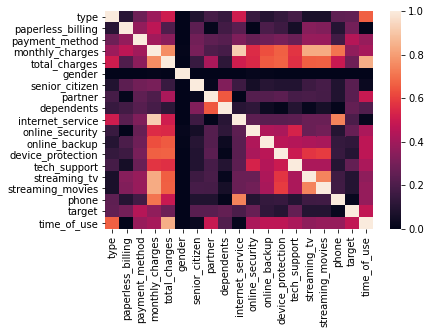

In [13]:
matrix = df.phik_matrix()

sns.heatmap(matrix)

In [14]:
matrix['target'].sort_values()

gender               0.000000
phone                0.021922
streaming_movies     0.093923
streaming_tv         0.096865
device_protection    0.101516
online_backup        0.126973
internet_service     0.196202
partner              0.232930
senior_citizen       0.233432
type                 0.251639
dependents           0.253936
tech_support         0.254615
online_security      0.264580
total_charges        0.278498
paperless_billing    0.295754
monthly_charges      0.360050
payment_method       0.449125
time_of_use          0.474001
target               1.000000
Name: target, dtype: float64

Удалим, из датасета столбцы, от которых никак не зависит целевой признак - `'gender'`, `'phone'`.

In [15]:
df = df.drop(['gender', 'phone'], axis=1).copy()

Наибольшей зависимостью к целевому признаку обладают `'monthly_charges'`, `'payment_method'`, `'time_of_use'`. Посмотрим как именно они зависят, построим графики. Гистограмму для ежемесячного платежа и времени использования услугами и барплот для платежного метода. 

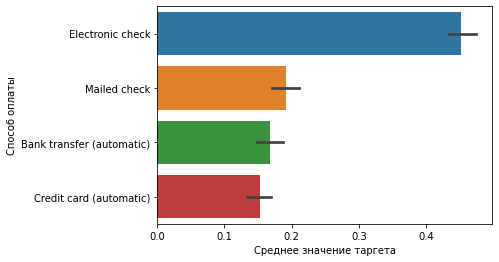

In [16]:
sns.barplot(data=df, x="target", y="payment_method")\
   .set(xlabel='Среднее значение таргета',
        ylabel='Способ оплаты');

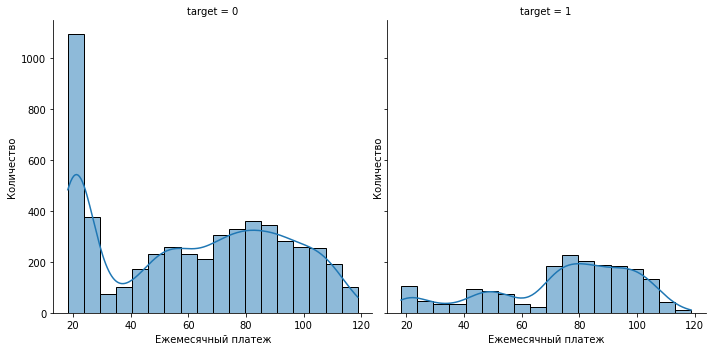

In [17]:
sns.displot(data=df, x="monthly_charges", col="target", kde=True)\
   .set(xlabel='Ежемесячный платеж',
        ylabel='Количество');

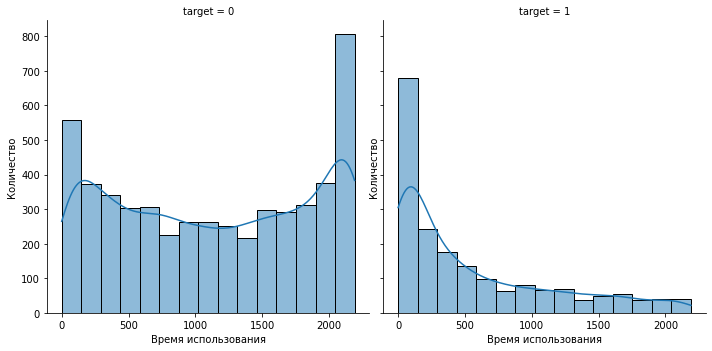

In [18]:
sns.displot(data=df, x="time_of_use", col="target", kde=True)\
   .set(xlabel='Время использования',
        ylabel='Количество');

Составим небольшой портрет типичного "перебежчика" - вероятнее всего это будет человек, который одновременно выбирает НЕ самый дешевый тариф, пользуется услугами менее 5 месяцев и...пользуется электронными чеками. 

Можно сделать определенные выводы: особое внимание стоит уделять клиентам, изначально выбирающим дорогие тарифы, постоянщики соответственно более верны. Также видимо необходимо запретить электронные чеки, по крайней мере выяснить, не совпадение ли это.

Изменим тип неколичественных столбцов на категориальные, чтобы в дальнейшем явно передавать их моделям.

In [19]:
cat_features = ['type',  'paperless_billing', 'payment_method', 'partner', 'dependents', 'internet_service', 
                'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies']
for x in cat_features:
    df[x] = df[x].astype('category')

Разделим нашу выборку на тренировочную и тестовую, заодно посмотрим на отношение целевого признака.

In [20]:
features = df.drop('target', axis=1)
target= df['target']

features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=.25, random_state=311022)

target.mean()

0.2653698707936959

Более чем каждый четвертый, на мой взгляд это много, за этим мы и здесь, так как признак распределен неравномерно, а применять балансировку мы не имеем права ведь данные должны быть максимально близкими к реальным, будем оценивать успех модели с помощью метрики ROC-AUC, в ней каждому классу задается свой вес.

## Обучение моделей

### LightGBM

Первой обучим модель LightGBM, с помощью GridSearch подберем гиперпараметры, выведем на экран лучшую модель и результат метрики.

In [32]:
model = lgb.LGBMClassifier() 
parametrs = {'boosting_type': ['gbdt'],  
             'objective'    : ['binary'],
             'num_leaves'   : [30, 40, 50],   
             'max_depth'    : [-1],
             'n_estimators' : [100, 200]}

grid = GridSearchCV(estimator = model, param_grid = parametrs, scoring='roc_auc', n_jobs=-1)
grid.fit(features_train, target_train, categorical_feature = 'auto')
print(grid.best_params_)
lgbm = grid.best_score_
print(lgbm)

{'boosting_type': 'gbdt', 'max_depth': -1, 'n_estimators': 200, 'num_leaves': 40, 'objective': 'binary'}
0.8891522121230672


In [33]:
model = lgb.LGBMClassifier(boosting_type='gbdt', max_depth=-1, n_estimators=200, num_leaves=40, objective='binary')
model.fit(features_train, target_train, categorical_feature = 'auto')
predict = model.predict(features_train)
acc = accuracy_score(target_train, predict)

acc

0.979742521772056

### CatBoost

Проделаем то же самое для модели CatBoost.

In [23]:
model = CatBoostClassifier()
parametrs = {'depth'          : [3, 6, 9],
              'learning_rate' : [0.1, 0.2],
              'iterations'    : [50, 100, 200]}

grid = GridSearchCV(estimator = model, param_grid = parametrs, scoring='roc_auc', n_jobs=-1)
grid.fit(features_train, target_train, cat_features=cat_features, verbose=False)
print(grid.best_params_)
cat = grid.best_score_
print(cat)

{'depth': 6, 'iterations': 200, 'learning_rate': 0.2}
0.8979715317062398


In [24]:
model = CatBoostClassifier(depth=6, iterations=200, learning_rate=.2)
model.fit(features_train, target_train, cat_features = cat_features, verbose=False)
predict = model.predict(features_train)
acc = accuracy_score(target_train, predict)

acc

0.9299507762211283

С небольшим перевесом лучший результат показала модель CatBoost, значение метрики - 0.9, и это не предел, но такой результат нас вполне устраивает, осталось убедиться и проверить на тестовой выборке.

### Dummy 

In [25]:
model = DummyClassifier(strategy="most_frequent")
model.fit(features_train, target_train)
predict = model.predict_proba(features_train)[:, 1]
dummy = roc_auc_score(target_train, predict)

dummy

0.5

In [26]:
model = DummyClassifier(strategy="most_frequent")
model.fit(features_train, target_train)
predict = model.predict(features_train)
acc = accuracy_score(target_train, predict)

acc

0.7328663385081409

С перевесом в одну сотую лучшей оказалась модель CatBoost, осталось проверить ее на тестовой выборке.

### Тестирование

In [27]:
model = CatBoostClassifier(depth=6, learning_rate=.2, iterations=200)
model.fit(features_train, target_train, cat_features=cat_features, verbose=False)
predict = model.predict_proba(features_test)[:, 1]
roc = roc_auc_score(target_test, predict)

roc

0.9062819425779273

На тесте все еще лучше, думаю это связано с архитектурой бустинга, ведь модель ищет минимальную ошибку при обучении, а так как признаки у нас более менее равномерно влияют на таргет (корреляция 0,1-0,4), можем предположить, что  при большей выборке модель показывала бы еще более лучший результат.

Теперь посмотрим какие признаки были наиболее полезны при обучении модели.

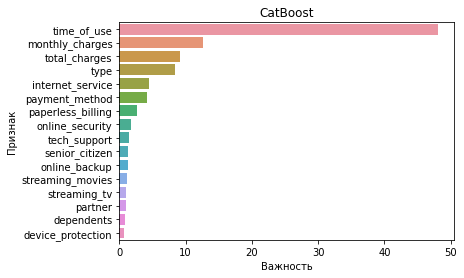

In [28]:
feature_importance = model.get_feature_importance(prettified=True)
sns.barplot(data=feature_importance, y='Feature Id', x='Importances')\
   .set(title='CatBoost',
        xlabel='Важность',
        ylabel='Признак');

И так, наиболее важными оказались примерно те же самые столбцы, которые имеют большую корреляцию с целевым признаком. CatBoost, как и любая другая машина лучше работает с числами, поэтому на вершине "полезности" признаки, имеющие числовой тип.

## Общий вывод по проекту

1. Перед нами была поставлена задача: Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. В том случае если пользователь захочет уйти ему будут предложены специальные условия. Основными услугами являются интернет и телефонная связь.
   
   Данные состояли из четырех файлов, содержащих информацию о клиенте, договоре и предоставляемых услугах. Информация о договорах актуальна на 1 февраля 2020.
   
   Основным шагами в ходе выполнения проекта будут: предобработка данных, подготовка признаков для обучения модели анализ их на мультиколинеарность; кодирование признаков и подбор гиперпараметров для моделей, сравнение результатов со "случайной моделью" и тестирование.

2. В ходе предобработки были обработаны все пропуски, а данные собраны в один датасет, чтобы с ним было удобнее работать.    Перед обучением модели столбцы с датами были удалены, вместо них мы вывели новый признак - время использования, который, забегая немного вперед, при обучении стал самым важным (!). 
   
   Данные были приведены к нужным типам, а признаки не имеющие зависимости с фактом ухода клиента были удалены, чтобы результат предсказания модели был менее случайным, а самыми коррелирующими по итогам исследования помимо уже названного времени пользования, были ежемесячный платеж и метод оплаты. То есть можно сделать вывод, что от качества каких-то определенных услуг уход клиента никак не зависит. 

   Так как выбранные нами модели не требуют кодирования, мы лишь привели столбцы к категориальному типу и напрямую передали такой список в модель. 
   
   В ходе выполнения проекта мы столкнулись с трудностями лишь на этапе предобработки: "пустые" значения в данных, которые приходилось изменять, названия признаков и их тип также за неимением подходящих фраемворков нужно было приводить к единому формату вручную. 

3. В качестве признаков для обучения модели были отобраны парметры.

   Пользование дополнительными услугами:
- Интернет-безопасность
- Выделенная линия поддержки
- Облачное хранилище 
- Стриминговое телевидение и каталог фильмов.

  Параметры договора: 
- Периодичность платы
- Ежемесячный платеж
- Cпособ оплаты
- Тип заполнения документов

  Личные данные:
- Семейное положение
- Вышел ли человек на пенсию
- Является ли иждивенцем
  
   А также данные о пользовании интернетом, общее время пользования услугами и сумма выплат за этот срок.

   В ходе исследование нами был составлен портрет клиента, на которого стоит обращать внимание: это человек, который пользуется услугами менее пяти месяцев, и в то же время выбирает тариф отличный от самого дешевого. Факторы, на которые стоит совершенно не стоит смотреть - это пол и телефонная связь. Все остальные показатели имеют примерно одинаковую зависиомость от таргета 10-30%.

4. Выборка была разбита на обучающую (75%) и тестовую для лучшей модели (25%). В ходе проекта рассматривались модели градиентного бустинга - LightGBM и Сatboost, которые лучше всего работают с категориальными признаками, а таковых у нас более 80%. При обучении гиперпараметры подбирались автоматически. Так как в наших данных сведений об ушедших клиентах почти в три раза меньше использовалась особая метрика, которая назначала каждому значению свой вес. Если бы мы запустили модель, предсказывающую таргет случайным образом, процент правильных ответов был бы значительно больше половины, но нашей основной задачей было предсказывать тот самый непопулярный класс.


| Model | ROC-AUC | Accuracy |
|---|---|---|
| LightGBM | 0.889152| 0.979742|
| CatBoost | 0.897972| 0.929950|
| Dummy | 0.500000| 0.732866|


   Поэтому из таблицы выше видно, что примененнная нами метрика показывает реально положение дел, ведь процент правильных ответов у случайной модели был 70-75%. Также стоит заметить, что в целом LightGBM дает больше верных предсказаний, но CatBoost лучше находит, клиентов, которые уйдут. 

   Лучшей моделью стала CatBoost c параметрами (depth=6, learning_rate=.2, iterations=200). Проведя анализ важности признаков мы выяснили, что таковыми являются все числовые столбцы - срок пользования, ежемесячный платеж, общая сумма выплат, логично ведь любая машина лучше всего работает с числами.  На тестовой выборке выбранная модель показала результат еще выше, чем на тренировочных данных - 0.91, что не может не радовать. С поставленной задачей мы справились!

В качестве ключевых шагов в решении задачи можно выделить удаление из данных для обучения признаков, от которых не зависит уход клиента и преобразование дат начала и конца контракта в общее количество дней. Таких манипуляций хватило для результата удовлетворяющего заданию.

Поэтому можно резюмировать, все пункты плана были выполнены, такое исследование однозначно поможет бизнесу.